In [1]:
# importing libraries
# for data import and data wrangling
import numpy as np # linear Algebra
import pandas as pd # for exploratory data analysis
import matplotlib.pyplot as plt 
# Data Visualization
import seaborn as sns
sns.set(style = "whitegrid")
# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')
# Data Preprocessing 
# Feature Scaling
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import ExtraTreesRegressor
# Evaluation performence of models
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score,mean_absolute_percentage_error

# Importing ML Models
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.svm import SVR

In [2]:
df = pd.read_csv(r"C:\Users\ABHISHEK\Downloads\archive(12)\Automobile_data.csv")

In [3]:
pd.set_option('display.max_columns',None)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [4]:
df.shape

(205, 26)

In [5]:
# print all Features
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [7]:
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

#### Observations:
1) Total 205 data points and 26 attributes.

2) Attributes has different data types.

3) Here shows no NaN values, but some attributes filled with '?' instead of NaN. we will  fill these NaN values in data preprocessing.

In [8]:
# Replacing '?' with NaN in Dataset
df.replace('?', np.nan, inplace = True)

In [9]:
df.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

Based on the summary above, following columns has missing values:

1) "normalized-losses": 41 missing data

2) "num-of-doors": 2 missing data

3) "bore": 4 missing data

4) "stroke" : 4 missing data

5) "horsepower": 2 missing data

6) "peak-rpm": 2 missing data

7) "price": 4 missing data

In [10]:
# In some columns missing values filled with '?', that's why some numerical columns was converted into object type
# Converting data type of numerical columns from object to numerical 
df['normalized-losses']=df['normalized-losses'].astype(float)
df['bore']=df['bore'].astype(float)
df['stroke']=df['stroke'].astype(float)
df['horsepower']=df['horsepower'].astype(float)
df['peak-rpm']=df['peak-rpm'].astype(float)
df['price']=df['price'].astype(float)

In [11]:
# Fill missing values in "number of doors" column
df[df['num-of-doors'].isnull()]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
27,1,148.0,dodge,gas,turbo,NaN,sedan,fwd,front,93.7,157.3,63.8,50.6,2191,ohc,four,98,mpfi,3.03,3.39,7.6,102.0,5500.0,24,30,8558.0
63,0,NaN,mazda,diesel,std,NaN,sedan,fwd,front,98.8,177.8,66.5,55.5,2443,ohc,four,122,idi,3.39,3.39,22.7,64.0,4650.0,36,42,10795.0


In [12]:
# Fetching Records containing Body type seden
df[(df['body-style']=='sedan')  & ((df['make']=='dodge'))]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
25,1,148.0,dodge,gas,std,four,sedan,fwd,front,93.7,157.3,63.8,50.6,1989,ohc,four,90,2bbl,2.97,3.23,9.4,68.0,5500.0,31,38,6692.0
26,1,148.0,dodge,gas,std,four,sedan,fwd,front,93.7,157.3,63.8,50.6,1989,ohc,four,90,2bbl,2.97,3.23,9.4,68.0,5500.0,31,38,7609.0
27,1,148.0,dodge,gas,turbo,NaN,sedan,fwd,front,93.7,157.3,63.8,50.6,2191,ohc,four,98,mpfi,3.03,3.39,7.6,102.0,5500.0,24,30,8558.0


From above observation we can conclude that dodge and mazda make and sedan body style vehicles has 4 number of doors.

In [13]:
#replace the missing 'num-of-doors' values by 'four'
df["num-of-doors"].replace(np.nan, "four", inplace=True)

In [14]:
# get all rows with null values in 'horsepower' column
df[df['horsepower'].isnull()]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
130,0,NaN,renault,gas,std,four,wagon,fwd,front,96.1,181.5,66.5,55.2,2579,ohc,four,132,mpfi,3.46,3.9,8.7,NaN,NaN,23,31,9295.0
131,2,NaN,renault,gas,std,two,hatchback,fwd,front,96.1,176.8,66.6,50.5,2460,ohc,four,132,mpfi,3.46,3.9,8.7,NaN,NaN,23,31,9895.0


In [15]:
# check correlation with other numerical features
df[df.columns[1:]].corr()['horsepower'][:-1]

normalized-losses    0.295772
wheel-base           0.352297
length               0.555003
width                0.642482
height              -0.110711
curb-weight          0.751034
engine-size          0.810773
bore                 0.577273
stroke               0.090254
compression-ratio   -0.205874
horsepower           1.000000
peak-rpm             0.130971
city-mpg            -0.803620
highway-mpg         -0.770908
Name: horsepower, dtype: float64

In [16]:
#  replacing missing value with with random number
df["horsepower"].replace(np.nan, 112, inplace=True)

In [17]:
# Get all rows with null values in 'peak-rpm' column
df[df['peak-rpm'].isnull()]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
130,0,NaN,renault,gas,std,four,wagon,fwd,front,96.1,181.5,66.5,55.2,2579,ohc,four,132,mpfi,3.46,3.9,8.7,112.0,NaN,23,31,9295.0
131,2,NaN,renault,gas,std,two,hatchback,fwd,front,96.1,176.8,66.6,50.5,2460,ohc,four,132,mpfi,3.46,3.9,8.7,112.0,NaN,23,31,9895.0


In [18]:
# checking other feature values of null records
df.iloc[130:132, 10:16]

,length,width,height,curb-weight,engine-type,num-of-cylinders
130,181.5,66.5,55.2,2579,ohc,four
131,176.8,66.6,50.5,2460,ohc,four


In [19]:
# getting median
df['peak-rpm'].median()

5200.0

In [20]:
# from above observations replacing missing value with 5200
df["peak-rpm"].replace(np.nan, 5200, inplace=True)

In [21]:
# get all rows with null values in 'bore' column
df[df['bore'].isnull()]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
55,3,150.0,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,65.7,49.6,2380,rotor,two,70,4bbl,NaN,NaN,9.4,101.0,6000.0,17,23,10945.0
56,3,150.0,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,65.7,49.6,2380,rotor,two,70,4bbl,NaN,NaN,9.4,101.0,6000.0,17,23,11845.0
57,3,150.0,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,65.7,49.6,2385,rotor,two,70,4bbl,NaN,NaN,9.4,101.0,6000.0,17,23,13645.0
58,3,150.0,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,65.7,49.6,2500,rotor,two,80,mpfi,NaN,NaN,9.4,135.0,6000.0,16,23,15645.0


In [22]:
df.iloc[55:59, 10:16]

,length,width,height,curb-weight,engine-type,num-of-cylinders
55,169.0,65.7,49.6,2380,rotor,two
56,169.0,65.7,49.6,2380,rotor,two
57,169.0,65.7,49.6,2385,rotor,two
58,169.0,65.7,49.6,2500,rotor,two


1) Here, for all engine type = rotor has NaN values for "bore" attributes.

2) Using domain knowledge,for rotary engine we don't have any bore and stroke, that's why for we got these attributes with NaN values. But keeping these attributes with NaN values is not a good idea. By using other attributes we will impute these values.

3) Index 55, 56, 57 are exactly same, only difference in price. But according to our data, there should be no price difference if all other attributes are same. We need to remove these duplicate entries.

In [23]:
# droping duplicates
df.drop([55,56], axis=0, inplace=True)

In [24]:
# check correlation with other numerical attributes
df[df.columns[1:]].corr()['bore'][:-1]

normalized-losses   -0.036167
wheel-base           0.490378
length               0.607480
width                0.559204
height               0.176195
curb-weight          0.649045
engine-size          0.594090
bore                 1.000000
stroke              -0.055909
compression-ratio    0.005203
horsepower           0.577439
peak-rpm            -0.262971
city-mpg            -0.594584
highway-mpg         -0.594572
Name: bore, dtype: float64

Numerical columns are less correlated with "bore". Let's check what relation we can find with categorical attributes. If categorical attributes are usefull then we will use it otherwise we will go for numerical categories for imputing missing values.

In [25]:
df["bore"].mean()

3.3297512437810957

In [26]:
# from above observations replacing missing value with mean
df["bore"].replace(np.nan,3.32, inplace=True)

In [27]:
# get all rows with null values in 'stroke' column
df[df['stroke'].isnull()]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
57,3,150.0,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,65.7,49.6,2385,rotor,two,70,4bbl,3.32,NaN,9.4,101.0,6000.0,17,23,13645.0
58,3,150.0,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,65.7,49.6,2500,rotor,two,80,mpfi,3.32,NaN,9.4,135.0,6000.0,16,23,15645.0


In [28]:
# check correlation with other numerical featues
df[df.columns[1:]].corr()['stroke'][:-1]

normalized-losses    0.065627
wheel-base           0.161477
length               0.129739
width                0.182956
height              -0.056999
curb-weight          0.168929
engine-size          0.206675
bore                -0.055909
stroke               1.000000
compression-ratio    0.186170
horsepower           0.092337
peak-rpm            -0.065935
city-mpg            -0.042906
highway-mpg         -0.044528
Name: stroke, dtype: float64

<AxesSubplot:ylabel='Density'>

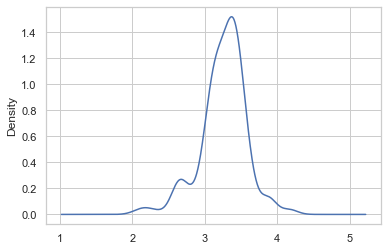

In [29]:
df['stroke'].plot(kind='kde')

In [30]:
stroke = df[(df['stroke'] >= 2.9) & (df['stroke'] <= 3.7)& (df['make']=='mazda')]
stroke['stroke'].mode()

0    3.39
dtype: float64

In [31]:
# from above observations replacing missing value with mode
df["stroke"].replace(np.nan,3.39, inplace=True)

In [32]:
# get all rows with null values in 'normalized-losses' column
df[df['normalized-losses'].isnull()]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
5,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,15250.0
7,1,NaN,audi,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,18920.0
9,0,NaN,audi,gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.40,7.0,160.0,5500.0,16,22,NaN
14,1,NaN,bmw,gas,std,four,sedan,rwd,front,103.5,189.0,66.9,55.7,3055,ohc,six,164,mpfi,3.31,3.19,9.0,121.0,4250.0,20,25,24565.0
15,0,NaN,bmw,gas,std,four,sedan,rwd,front,103.5,189.0,66.9,55.7,3230,ohc,six,209,mpfi,3.62,3.39,8.0,182.0,5400.0,16,22,30760.0
16,0,NaN,bmw,gas,std,two,sedan,rwd,front,103.5,193.8,67.9,53.7,3380,ohc,six,209,mpfi,3.62,3.39,8.0,182.0,5400.0,16,22,41315.0
17,0,NaN,bmw,gas,std,four,sedan,rwd,front,110.0,197.0,70.9,56.3,3505,ohc,six,209,mpfi,3.62,3.39,8.0,182.0,5400.0,15,20,36880.0


<AxesSubplot:xlabel='normalized-losses', ylabel='Density'>

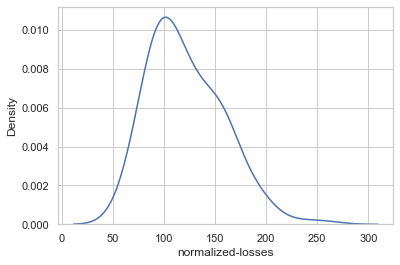

In [33]:
# plotiing kde plot to check distribution
sns.set_style('whitegrid')
sns.kdeplot(df['normalized-losses'], bw=0.5)

In [34]:
# getting median value
median = df['normalized-losses'].median()

In [35]:
# from above observations replacing missing value with median
df["normalized-losses"].replace(np.nan, median, inplace=True)

In [36]:
# get all rows with null values in 'price' column
df[df['price'].isnull()]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
9,0,115.0,audi,gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.40,7.0,160.0,5500.0,16,22,NaN
44,1,115.0,isuzu,gas,std,two,sedan,fwd,front,94.5,155.9,63.6,52.0,1874,ohc,four,90,2bbl,3.03,3.11,9.6,70.0,5400.0,38,43,NaN
45,0,115.0,isuzu,gas,std,four,sedan,fwd,front,94.5,155.9,63.6,52.0,1909,ohc,four,90,2bbl,3.03,3.11,9.6,70.0,5400.0,38,43,NaN
129,1,115.0,porsche,gas,std,two,hatchback,rwd,front,98.4,175.7,72.3,50.5,3366,dohcv,eight,203,mpfi,3.94,3.11,10.0,288.0,5750.0,17,28,NaN


In [37]:
df[df.columns[1:]].corr()['price'][:-1]

normalized-losses    0.096902
wheel-base           0.584458
length               0.690470
width                0.751298
height               0.133572
curb-weight          0.834351
engine-size          0.877772
bore                 0.543229
stroke               0.082970
compression-ratio    0.070701
horsepower           0.808513
peak-rpm            -0.099820
city-mpg            -0.695414
highway-mpg         -0.712076
Name: price, dtype: float64

In [38]:
price = df[(df['height'] >= 50) & (df['height'] <= 52)& (df['engine-type']=='ohc')]
mean = price['price'].mean()

In [39]:
# from above observations replacing missing value with median
df["price"].replace(np.nan, mean, inplace=True)

In [40]:
# Checked if theres any missing values remain
df.isnull().values.any()

False

### Exploratory Data Analysis

In [41]:
# describe numerical features
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000
mean,0.812808,120.310345,98.790640,174.099015,65.909852,53.765517,2557.295567,127.467980,3.329655,3.256749,10.149852,104.364532,5117.487685,25.300493,30.827586,13141.959960
std,1.232575,31.826685,6.041635,12.387929,2.155697,2.420701,522.956903,41.459663,0.272183,0.315427,3.990965,39.720373,471.360044,6.522873,6.876911,7927.377444
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,101.000000,94.500000,166.300000,64.050000,52.000000,2145.000000,98.000000,3.150000,3.110000,8.550000,70.000000,4800.000000,19.000000,25.000000,7781.500000
50%,1.000000,115.000000,97.000000,173.200000,65.500000,54.100000,2420.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,9995.000000
75%,2.000000,135.500000,102.400000,183.300000,66.900000,55.500000,2943.500000,143.000000,3.585000,3.410000,9.400000,116.000000,5500.000000,30.000000,35.000000,16500.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


## Univariate Analysis

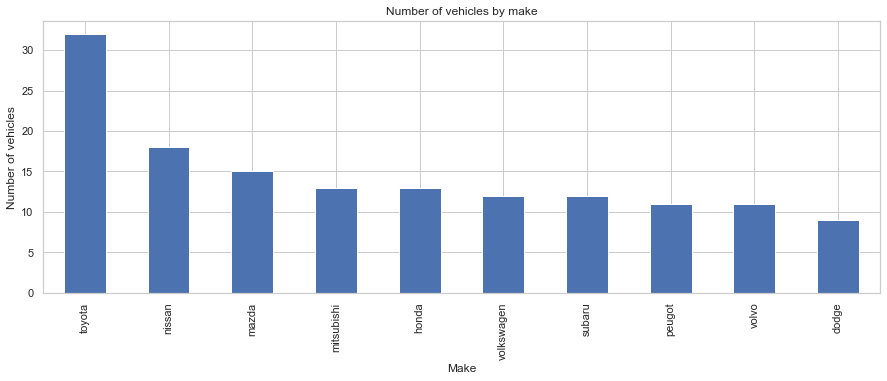

In [42]:
df.make.value_counts().nlargest(10).plot(kind='bar', figsize=(15,5))
plt.title("Number of vehicles by make")
plt.ylabel('Number of vehicles')
plt.xlabel('Make');

Text(0.5, 0, 'Risk rating')

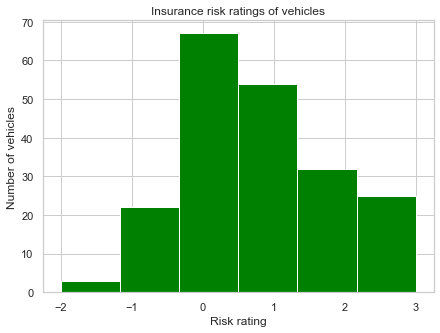

In [43]:
plt.figure(figsize=(7,5))
plt.hist(x=df.symboling,bins=6,color='green');
plt.title("Insurance risk ratings of vehicles")
plt.ylabel('Number of vehicles')
plt.xlabel('Risk rating')

Text(0.5, 0, 'Normalized losses')

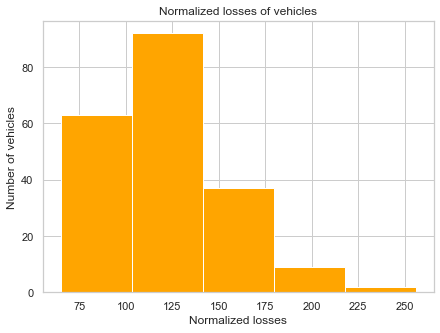

In [44]:
plt.figure(figsize=(7,5))
df['normalized-losses'].hist(bins=5,color='orange');
plt.title("Normalized losses of vehicles")
plt.ylabel('Number of vehicles')
plt.xlabel('Normalized losses')

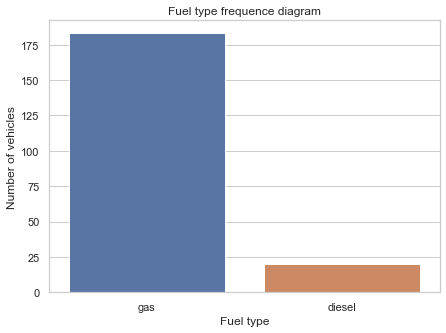

In [45]:
plt.figure(figsize=(7,5))
sns.countplot(x = df['fuel-type'])
plt.title("Fuel type frequence diagram")
plt.ylabel('Number of vehicles')
plt.xlabel('Fuel type');

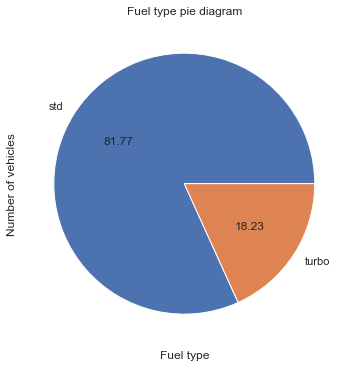

In [46]:
df['aspiration'].value_counts().plot.pie(figsize=(6, 6), autopct='%.2f')
plt.title("Fuel type pie diagram")
plt.ylabel('Number of vehicles')
plt.xlabel('Fuel type');

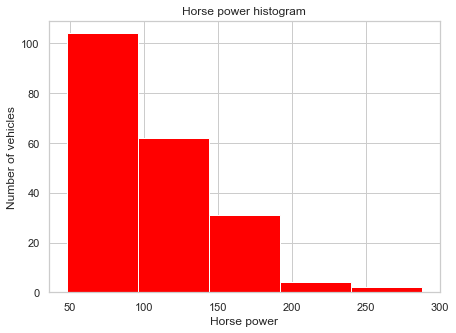

In [47]:
plt.figure(figsize=(7,5))
df.horsepower.hist(bins=5,color='red');
plt.title("Horse power histogram")
plt.ylabel('Number of vehicles')
plt.xlabel('Horse power');

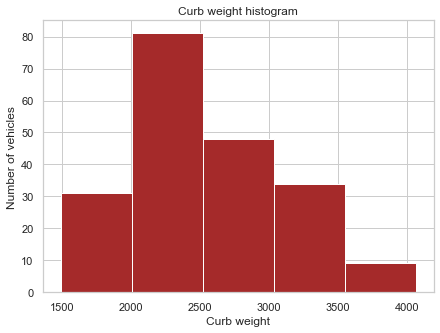

In [48]:
plt.figure(figsize=(7,5))
df['curb-weight'].hist(bins=5,color='brown');
plt.title("Curb weight histogram")
plt.ylabel('Number of vehicles')
plt.xlabel('Curb weight');

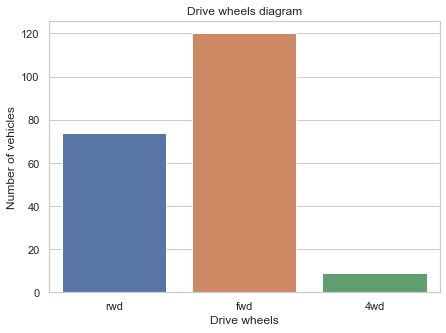

In [49]:
plt.figure(figsize=(7,5))
sns.countplot(x = df['drive-wheels'])
plt.title("Drive wheels diagram")
plt.ylabel('Number of vehicles')
plt.xlabel('Drive wheels');

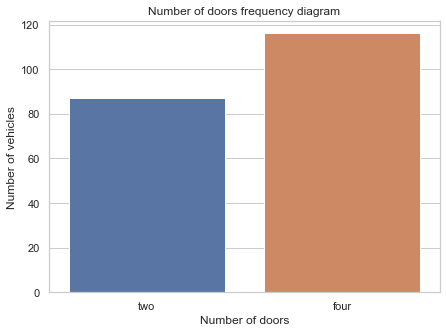

In [50]:
plt.figure(figsize=(7,5))
sns.countplot(x = df['num-of-doors'])
plt.title("Number of doors frequency diagram")
plt.ylabel('Number of vehicles')
plt.xlabel('Number of doors');

### Insights
We have taken some key features of the automobile dataset for this analysis and below are our findings.
1. Toyota is the make of the car which has most number of vehicles with more than 40% than the 2nd highest Nissan
2. Most preferred fuel type for the customer is standard vs trubo having more than 80% of the choice
3. For drive wheels, front wheel drive has most number of cars followed by rear wheel and four wheel. There are very less number of cars for four wheel drive.
4. Curb weight of the cars are distributed between 1500 and 4000 approximately
5. Symboling or the insurance risk rating have the ratings between -3 and 3 however for our dataset it starts from -2. There are more cars in the range of 0 and 1.
6. Normalized losses which is the average loss payment per insured vehicle year is has more number of cars in the range between 65 and 150.

In [51]:
# Numerical Features
num_features = ['symboling','normalized-losses','wheel-base','length','width','height','curb-weight','engine-size','bore','stroke','compression-ratio','horsepower','peak-rpm','city-mpg','highway-mpg']

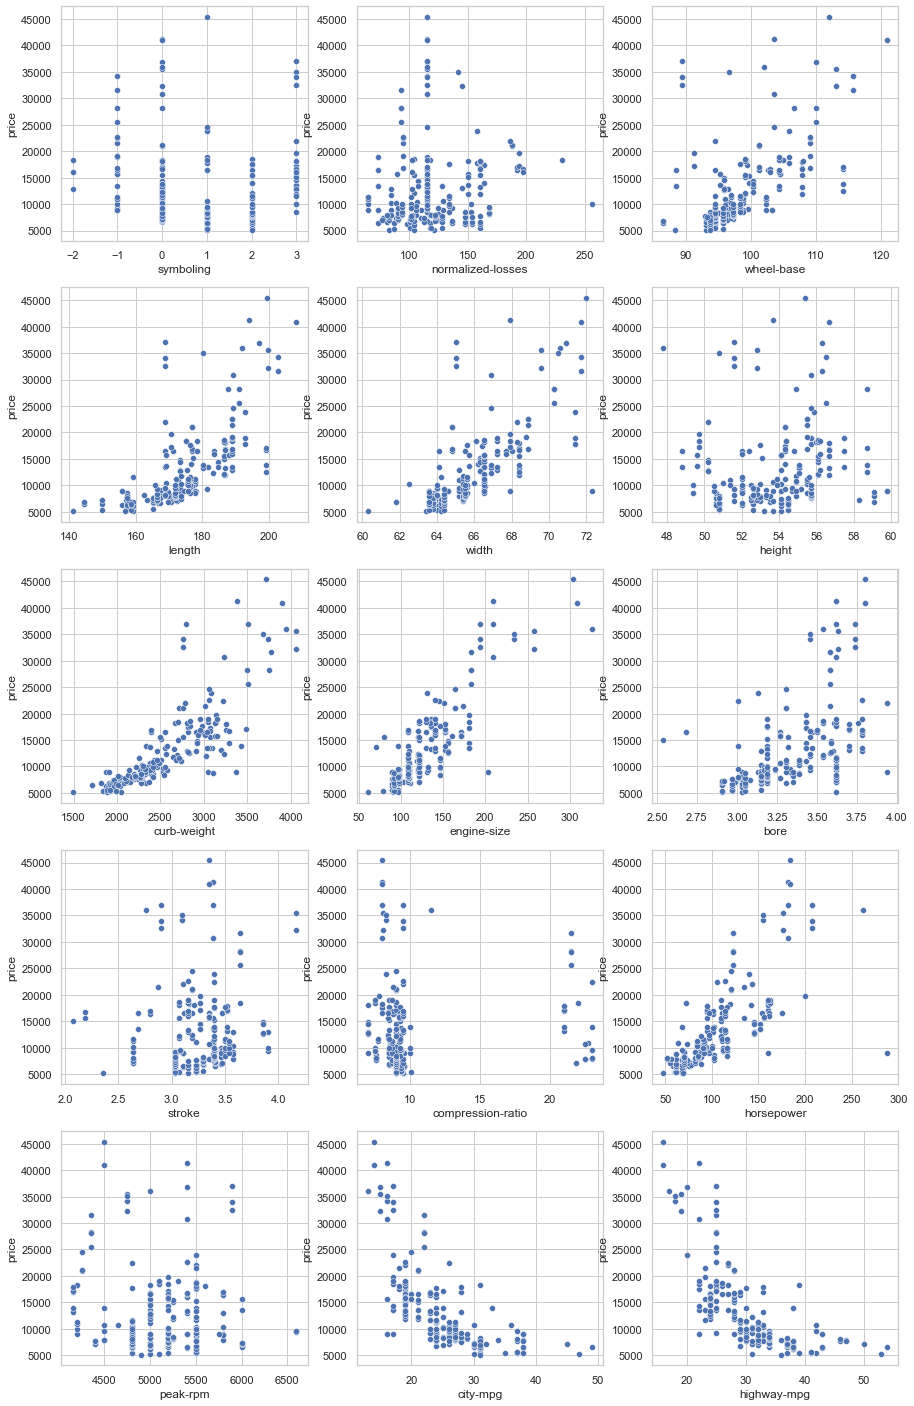

In [52]:
# scatter plot for all numerical attributes
plt.figure(figsize = (15,25))
for i in enumerate (num_features):
    plt.subplot(5,3,i[0]+1)
    sns.scatterplot(x = i[1],y = 'price',data = df)

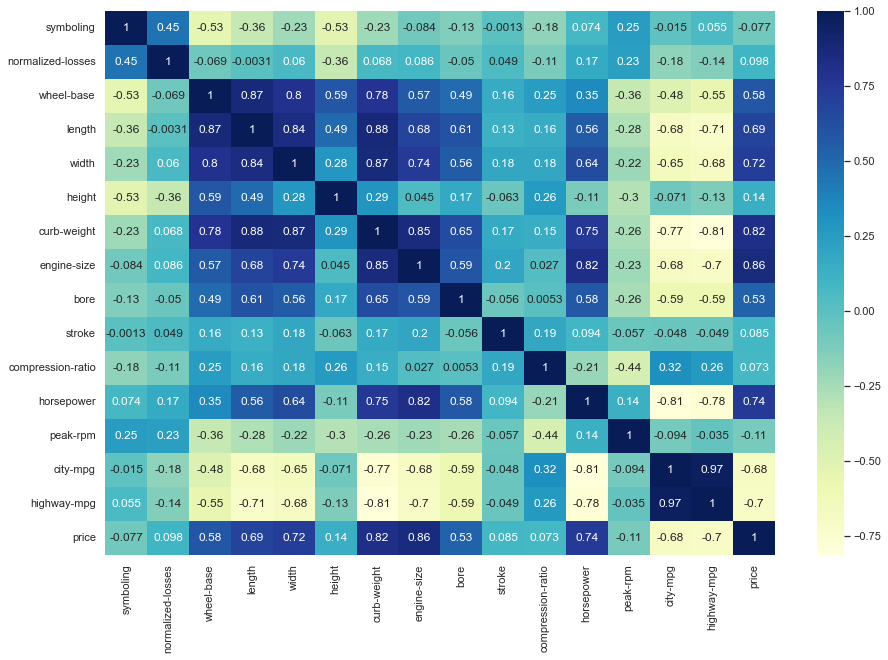

In [53]:
# correlation of numerical attributes
plt.figure(figsize=(15,10))
dataplot = sns.heatmap(df.corr(),cmap="YlGnBu",annot=True)

### Observations from scatter plots and correlation matrix:
1) There is a positive linear relationship between price and following Features(wheel base, length, width, curb weight, engine size, bore, horsepower). From this we can say that, when overall size and engine of vehicle increase, it's price also increase.

2) There is a inverse relationship between price and following Features( city mpg, highway mpg). As we can see in correlation matrix almost all attributes has negative relationship with these Features. So we can say that, when overall size of vehicle increases it,s mpg decreases.

3) Compression ratio and height Features has very less relation with other Features.

4) Other Features has no relation between "price".

All above observations are only for numerical Features. For categorical attributes we will use box plot.

In [54]:
# taking categorical features for plotting box plot
cat_features = ['fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
        'engine-type','num-of-cylinders', 'fuel-system']

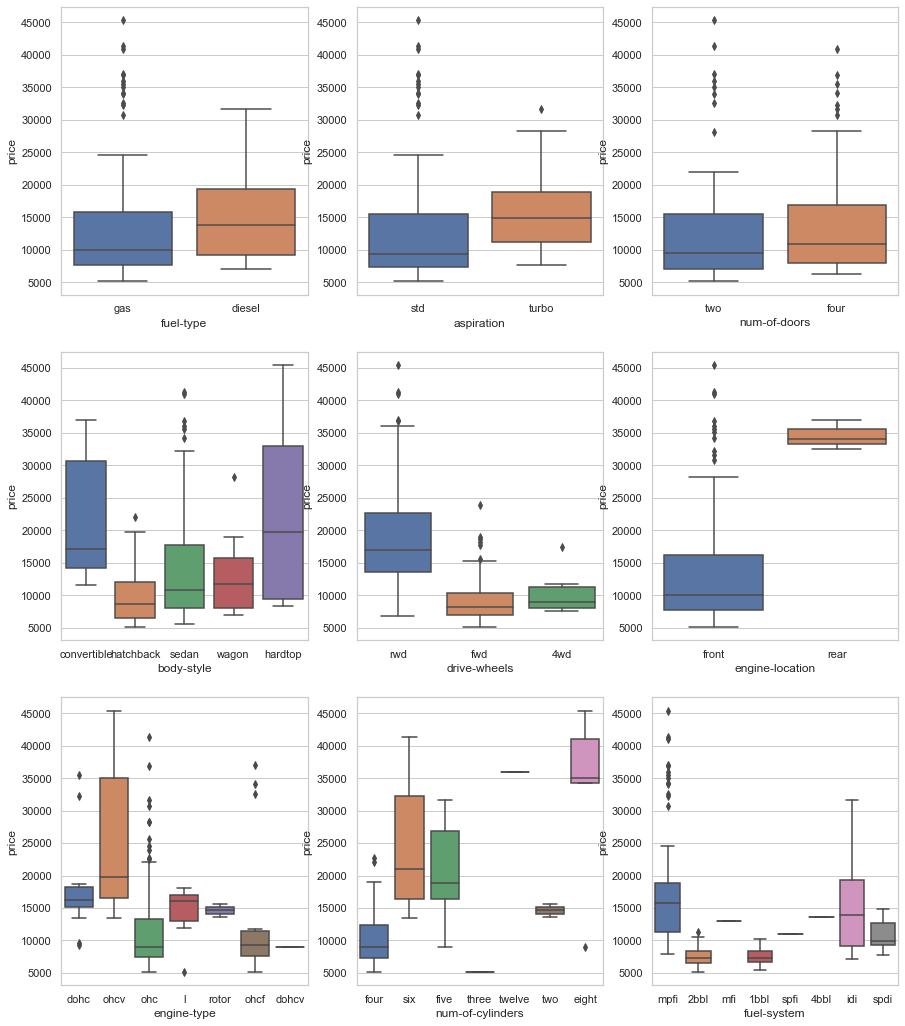

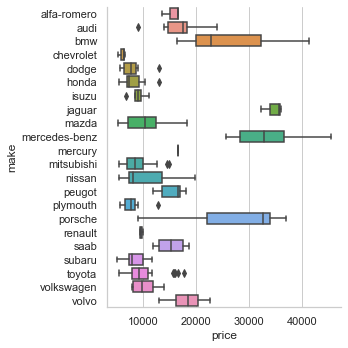

In [55]:
# box plot for all ctegorical features
plt.figure(figsize = (15,18))
for i in enumerate (cat_features):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(x = i[1],y = 'price',data = df)
sns.catplot(y="make", x="price", kind="box", data=df)

### Observations on categorical attributes:
1) In engine location vs price box plot we can see huge price difference between front and rear engine location. This is not only because of engine location, price is affected because of make. All these rear engine location models only made by porsche and may be porsche make vehicals are costlier.

2) From above plots we observe that rear wheel drive, rear engine location, eight number of cylinders, mercedes-benz, jaguar and porsche make vehicles are costier than others.

3) We observe that data has some outliears but we are not removing it because we have very small data.

#### Encode categorical features
converting all categorical features into numerical fetures by using dummy encoder function

In [56]:
# list of all categorical attributes
cat_features = ['make','fuel-type','aspiration','num-of-doors','body-style','drive-wheels','engine-location','engine-type','num-of-cylinders','fuel-system']

In [57]:
le = LabelEncoder()

In [58]:
df[cat_features] = df[cat_features].apply(le.fit_transform)

In [59]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,115.0,0,1,0,1,0,2,0,88.6,168.8,64.1,48.8,2548,0,2,130,5,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,115.0,0,1,0,1,0,2,0,88.6,168.8,64.1,48.8,2548,0,2,130,5,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,115.0,0,1,0,1,2,2,0,94.5,171.2,65.5,52.4,2823,5,3,152,5,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,1,1,0,0,3,1,0,99.8,176.6,66.2,54.3,2337,3,2,109,5,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,1,1,0,0,3,0,0,99.4,176.6,66.4,54.3,2824,3,1,136,5,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [60]:
df.shape

(203, 26)

### split data into independant and target data

In [61]:
X = df.drop('price', axis = 1)
y = df['price']

In [62]:
def count_outliers(data,col):
        q1 = data[col].quantile(0.25,interpolation='nearest')
        q2 = data[col].quantile(0.5,interpolation='nearest')
        q3 = data[col].quantile(0.75,interpolation='nearest')
        q4 = data[col].quantile(1,interpolation='nearest')
        IQR = q3 -q1
        global LLP
        global ULP
        LLP = q1 - 1.5*IQR
        ULP = q3 + 1.5*IQR
        if data[col].min() > LLP and data[col].max() < ULP:
            print("No outliers in",i)
        else:
            print("There are outliers in",i)
            x = data[data[col]<LLP][col].size
            y = data[data[col]>ULP][col].size
            a.append(i)
            print('Count of outliers are:',x+y)
global a
a = []
for i in X.columns:
    count_outliers(X,i)

No outliers in symboling
There are outliers in normalized-losses
Count of outliers are: 8
No outliers in make
There are outliers in fuel-type
Count of outliers are: 20
There are outliers in aspiration
Count of outliers are: 37
No outliers in num-of-doors
There are outliers in body-style
Count of outliers are: 6
No outliers in drive-wheels
There are outliers in engine-location
Count of outliers are: 3
There are outliers in wheel-base
Count of outliers are: 3
No outliers in length
There are outliers in width
Count of outliers are: 8
No outliers in height
No outliers in curb-weight
There are outliers in engine-type
Count of outliers are: 55
There are outliers in num-of-cylinders
Count of outliers are: 44
There are outliers in engine-size
Count of outliers are: 7
No outliers in fuel-system
No outliers in bore
There are outliers in stroke
Count of outliers are: 20
There are outliers in compression-ratio
Count of outliers are: 28
There are outliers in horsepower
Count of outliers are: 6
Ther

In [63]:
# new_df_cap = df.copy()
# def Remove_Out(data,col):
#     q1 = data[col].quantile(0.25,interpolation='nearest')
#     q2 = data[col].quantile(0.5,interpolation='nearest')
#     q3 = data[col].quantile(0.75,interpolation='nearest')
#     q4 = data[col].quantile(1,interpolation='nearest')
#     IQR = q3 -q1
#     global LLP
#     global ULP
#     LLP = q1 - 1.5*IQR
#     ULP = q3 + 1.5*IQR
#     data[col] = np.where(
#         data[col] > ULP,
#         ULP,
#         np.where(
#             data[col] < LLP,
#             LLP,
#             data[col]
#         )
#     )
# Remove_Out(X,X.columns)

### split data into train and test set

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 15)

In [65]:
print('The Shape of the X_train data is ', X_train.shape)
print('The Shape of the y_train data is ', y_train.shape)
print('The Shape of the X_test data is ', X_test.shape)
print('The Shape of the y_test data is ', y_test.shape)

The Shape of the X_train data is  (142, 25)
The Shape of the y_train data is  (142,)
The Shape of the X_test data is  (61, 25)
The Shape of the y_test data is  (61,)


**We are using 70% data points for training and 30% data points for test.**

### Data Standardization
Standardization data means bringing all attributes on same scale with mean = 0 and standard deviation = 1.

In [66]:
# Feature Scaling using staderdscaler
scaler = StandardScaler()
std_X_train = scaler.fit_transform(X_train)
std_X_test = scaler.transform(X_test)

## Model Building

### Apply Linear Regression

Linear Regression model require linearly seperable data

In [67]:
lr = LinearRegression()
lr.fit(std_X_train, y_train)
print('train accuracy : ',lr.score(std_X_train, y_train))
print('test accuracy : ',lr.score(std_X_test, y_test))

train accuracy :  0.8733351910091686
test accuracy :  0.8630459164923031


In [68]:
y_pred = lr.predict(std_X_test)
print('MSE = ',mean_squared_error(y_pred, y_test))

MSE =  9006552.745409254


In [69]:
reg = Ridge()
reg.fit(std_X_train, y_train)
print('train accuracy : ',reg.score(std_X_train, y_train))
print('test accuracy : ',reg.score(std_X_test, y_test))

train accuracy :  0.8723381304714983
test accuracy :  0.8756826249023282


In [70]:
y_pred1 = reg.predict(std_X_test)
print('MSE = ',mean_squared_error(y_pred1, y_test))

MSE =  8175521.074733655


In [71]:
lasso = Lasso()
lasso.fit(std_X_train, y_train)
print('train accuracy : ',lasso.score(std_X_train, y_train))
print('test accuracy : ',lasso.score(std_X_test, y_test))

train accuracy :  0.8733203440073426
test accuracy :  0.8638655196219693


In [72]:
y_pred2 = lasso.predict(std_X_test)
print('MSE = ',mean_squared_error(y_pred2, y_test))

MSE =  8952652.937323382


In [111]:
SV = SVR(kernel = 'poly', degree = 2 ,C=1.0)
SV.fit(std_X_train, y_train)
print('train accuracy : ',SV.score(std_X_train, y_train))
print('test accuracy : ',SV.score(std_X_test, y_test))

train accuracy :  -0.13364732337933405
test accuracy :  -0.07310077548924387


In [109]:
y_pred3 = SV.predict(std_X_test)
print('MSE = ',mean_squared_error(y_pred3, y_test))

MSE =  70082744.63775271


In [112]:
d = dict({"MODEL NAME":["Linear Regression","Ridge","Lasso","SVR"],
          'Mean Absolute Error':[mean_absolute_error(y_test, y_pred),mean_absolute_error(y_test, y_pred1),mean_absolute_error(y_pred2, y_test),mean_absolute_error(y_pred3, y_test)],
          'Mean Squared Error':[mean_squared_error(y_pred, y_test),mean_squared_error(y_pred1, y_test),mean_squared_error(y_pred2, y_test),mean_squared_error(y_pred3, y_test)],
          'Root Mean Squared Error':[np.sqrt(mean_squared_error(y_test, y_pred)),np.sqrt(mean_squared_error(y_pred1, y_test)),np.sqrt(mean_squared_error(y_pred2, y_test)),np.sqrt(mean_squared_error(y_pred3, y_test))],
          'R-squared':[r2_score(y_test, y_pred),r2_score(y_test, y_pred1),r2_score(y_test, y_pred2),r2_score(y_test, y_pred3)],
          'Train accuracy':[0.8984713982980197,0.8982195050031361,0.8984636943000567,-0.1318677024565389],
          'Test accuracy':[0.8118654670807763,0.8152797306960516,0.8121369182999469,-0.07310077548924387]
         })
score = pd.DataFrame(d)
score

,MODEL NAME,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,R-squared,Train accuracy,Test accuracy
0,Linear Regression,2179.060691,9.006553e+06,3001.091926,0.863046,0.898471,0.811865
1,Ridge,2090.212084,8.175521e+06,2859.286812,0.875683,0.898220,0.815280
2,Lasso,2167.298018,8.952653e+06,2992.098417,0.863866,0.898464,0.812137
3,SVR,5084.075883,7.008274e+07,8371.543743,-0.065682,-0.131868,-0.073101


## The Best suited Model For Predicting Price is Ridge Regression